In [ ]:
#imports
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import random as rd

# remove warnings
import warnings
warnings.simplefilter(action='ignore')

### Import of ESS dataset

In [ ]:
ess = pd.read_csv('ESS9e03_1.csv', low_memory = False)

In [ ]:
ess.head(20)

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,domain
0,ESS9e03_1,9,3.1,17.02.2021,27,AT,0.581174,0.218111,0.302091,0.065890,...,2018,20.0,19.0,2.0,12,2018,21.0,7.0,46.0,2.0
1,ESS9e03_1,9,3.1,17.02.2021,137,AT,1.062772,0.413473,0.302091,0.124907,...,2018,9.0,39.0,19.0,12,2018,11.0,6.0,73.0,2.0
2,ESS9e03_1,9,3.1,17.02.2021,194,AT,1.376509,2.270293,0.302091,0.685836,...,2018,19.0,13.0,12.0,11,2018,20.0,48.0,92.0,2.0
3,ESS9e03_1,9,3.1,17.02.2021,208,AT,0.993399,0.386483,0.302091,0.116753,...,2018,16.0,31.0,26.0,11,2018,18.0,49.0,134.0,2.0
4,ESS9e03_1,9,3.1,17.02.2021,220,AT,0.377353,1.032102,0.302091,0.311789,...,2018,13.0,53.0,5.0,12,2018,14.0,39.0,40.0,2.0
5,ESS9e03_1,9,3.1,17.02.2021,254,AT,1.479353,0.575545,0.302091,0.173867,...,2018,16.0,14.0,3.0,12,2018,17.0,12.0,52.0,2.0
6,ESS9e03_1,9,3.1,17.02.2021,290,AT,0.991758,0.720604,0.302091,0.217688,...,2018,14.0,39.0,29.0,9,2018,15.0,57.0,75.0,2.0
7,ESS9e03_1,9,3.1,17.02.2021,301,AT,0.309859,0.130113,0.302091,0.039306,...,2018,17.0,45.0,9.0,11,2018,18.0,56.0,67.0,2.0
8,ESS9e03_1,9,3.1,17.02.2021,305,AT,1.230384,1.770760,0.302091,0.534931,...,2018,16.0,19.0,10.0,10,2018,17.0,11.0,32.0,2.0
9,ESS9e03_1,9,3.1,17.02.2021,400,AT,0.458836,0.742814,0.302091,0.224398,...,2018,12.0,27.0,27.0,10,2018,13.0,48.0,75.0,2.0


#### Selecting only France

In [ ]:
france = ess[ess['cntry'] == 'FR']
france

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,domain
20442,ESS9e03_1,9,3.1,17.02.2021,23,FR,1.119029,0.914294,2.726687,2.492995,...,2018,16.0,1.0,20.0,12,2018,17.0,11.0,70.0,2.0
20443,ESS9e03_1,9,3.1,17.02.2021,41,FR,0.537166,0.741584,2.726687,2.022066,...,2019,13.0,59.0,6.0,2,2019,14.0,51.0,52.0,1.0
20444,ESS9e03_1,9,3.1,17.02.2021,53,FR,1.712321,1.218063,2.726687,3.321277,...,2019,9.0,22.0,7.0,1,2019,10.0,28.0,66.0,2.0
20445,ESS9e03_1,9,3.1,17.02.2021,83,FR,1.036066,0.925803,2.726687,2.524374,...,2019,15.0,30.0,8.0,1,2019,16.0,40.0,70.0,1.0
20446,ESS9e03_1,9,3.1,17.02.2021,98,FR,0.566907,2.774719,2.726687,7.565790,...,2018,9.0,0.0,21.0,11,2018,9.0,59.0,59.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22447,ESS9e03_1,9,3.1,17.02.2021,69851,FR,1.677517,1.472812,2.726687,4.015897,...,2019,9.0,57.0,23.0,1,2019,10.0,38.0,41.0,2.0
22448,ESS9e03_1,9,3.1,17.02.2021,69860,FR,0.571441,0.553700,2.726687,1.509766,...,2018,13.0,33.0,17.0,12,2018,15.0,6.0,93.0,2.0
22449,ESS9e03_1,9,3.1,17.02.2021,69952,FR,1.131332,3.999952,2.726687,10.906615,...,2019,16.0,47.0,11.0,1,2019,17.0,54.0,67.0,2.0
22450,ESS9e03_1,9,3.1,17.02.2021,69962,FR,0.527490,0.492084,2.726687,1.341760,...,2018,10.0,39.0,4.0,12,2018,10.0,49.0,10.0,1.0


#### Droping Nans

In [ ]:
fr_ess = france[['netusoft', 'polintr', 'trstprt', 'stflife', 'stfeco', 'sclmeet', 'agea']]
fr_ess = fr_ess[(fr_ess['netusoft'] != 7) & (fr_ess['netusoft'] != 8) & (fr_ess['netusoft']!=9)]
fr_ess = fr_ess[(fr_ess['trstprt'] != 77) & (fr_ess['trstprt'] != 88) & (fr_ess['trstprt'] !=99)]
fr_ess = fr_ess[(fr_ess['stflife'] != 77) & (fr_ess['stflife'] != 88) & (fr_ess['stflife'] !=99)]
fr_ess = fr_ess[(fr_ess['stfeco'] != 77) & (fr_ess['stfeco'] != 88) & (fr_ess['stfeco'] !=99)]
fr_ess = fr_ess[(fr_ess['sclmeet'] != 77) & (fr_ess['sclmeet'] != 88) & (fr_ess['sclmeet'] !=99)]
fr_ess = fr_ess[(fr_ess['agea'] != 999)]
fr_ess

,netusoft,polintr,trstprt,stflife,stfeco,sclmeet,agea
20442,3,1,2,6,3,6,72
20443,5,3,5,9,5,7,30
20444,5,1,1,6,0,6,77
20445,5,4,0,7,0,3,24
20446,1,4,3,3,3,2,50
...,...,...,...,...,...,...,...
22446,5,3,0,0,0,6,77
22447,5,3,3,4,3,7,43
22448,2,3,3,6,2,6,71
22449,5,3,4,3,2,5,45


### Generation of MCAR missing data

In [ ]:
empty_list = []
random_list = [rd.randint(1, 1900) for _ in range(20000)] # for random choosing data
for n in random_list:
    item = fr_ess.iloc[n:n+10,:] # making the slices
    mask = np.random.choice([True, False], size=tuple([len(item), 1])) # mask for column with missings
    matrix = np.full((len(item), item.shape[1] - 1), False)

    number = rd.randint(1, 7)
    matrix_new = np.concatenate((matrix[:, :number], mask, matrix[:, number:]), axis=1)  # mask for full data slice

    MCAR_matrix = item.mask(matrix_new) # making MCAR missing data
    empty_list.append([MCAR_matrix.to_numpy(), matrix_new])

In [ ]:
result_1 = pd.DataFrame(empty_list, columns = ['Xobs', 'Xmis'])
result_1

,Xobs,Xmis
0,"[[4.0, 1.0, 7.0, 7.0, 5.0, 6.0, 71.0], [5.0, 4...","[[False, False, False, False, False, False, Fa..."
1,"[[4.0, 4.0, 2.0, nan, 4.0, 5.0, 40.0], [4.0, 3...","[[False, False, False, True, False, False, Fal..."
2,"[[5.0, 3.0, 2.0, 5.0, 2.0, nan, 34.0], [5.0, 3...","[[False, False, False, False, False, True, Fal..."
3,"[[5.0, 4.0, 2.0, 8.0, 5.0, nan, 18.0], [5.0, 1...","[[False, False, False, False, False, True, Fal..."
4,"[[5.0, 3.0, 5.0, 9.0, 6.0, 5.0, nan], [5.0, 1....","[[False, False, False, False, False, False, Tr..."
...,...,...
19995,"[[5.0, 4.0, nan, 2.0, 2.0, 5.0, 54.0], [1.0, 2...","[[False, False, True, False, False, False, Fal..."
19996,"[[5.0, 3.0, 7.0, 7.0, 2.0, nan, 78.0], [5.0, 2...","[[False, False, False, False, False, True, Fal..."
19997,"[[5.0, 3.0, 2.0, 9.0, 4.0, 7.0, 37.0], [4.0, 3...","[[False, False, False, False, False, False, Fa..."
19998,"[[5.0, 2.0, 2.0, 7.0, 3.0, 4.0, 75.0], [5.0, 1...","[[False, False, False, False, False, False, Fa..."


In [ ]:
result_1['MDM'] = 0 #MCAR => 0
result_1

,Xobs,Xmis,MDM
0,"[[4.0, 1.0, 7.0, 7.0, 5.0, 6.0, 71.0], [5.0, 4...","[[False, False, False, False, False, False, Fa...",0
1,"[[4.0, 4.0, 2.0, nan, 4.0, 5.0, 40.0], [4.0, 3...","[[False, False, False, True, False, False, Fal...",0
2,"[[5.0, 3.0, 2.0, 5.0, 2.0, nan, 34.0], [5.0, 3...","[[False, False, False, False, False, True, Fal...",0
3,"[[5.0, 4.0, 2.0, 8.0, 5.0, nan, 18.0], [5.0, 1...","[[False, False, False, False, False, True, Fal...",0
4,"[[5.0, 3.0, 5.0, 9.0, 6.0, 5.0, nan], [5.0, 1....","[[False, False, False, False, False, False, Tr...",0
...,...,...,...
19995,"[[5.0, 4.0, nan, 2.0, 2.0, 5.0, 54.0], [1.0, 2...","[[False, False, True, False, False, False, Fal...",0
19996,"[[5.0, 3.0, 7.0, 7.0, 2.0, nan, 78.0], [5.0, 2...","[[False, False, False, False, False, True, Fal...",0
19997,"[[5.0, 3.0, 2.0, 9.0, 4.0, 7.0, 37.0], [4.0, 3...","[[False, False, False, False, False, False, Fa...",0
19998,"[[5.0, 2.0, 2.0, 7.0, 3.0, 4.0, 75.0], [5.0, 1...","[[False, False, False, False, False, False, Fa...",0


### Generation of MAR missing data

In [ ]:
empty_list = []
counter = 0
random_list = [rd.randint(1, 1900) for _ in range(20000)] #list for subsampling from dataset
for n in random_list:
    item = fr_ess.iloc[n:n+10,:]
    m = rd.randint(0, 6) #random chosing for a column on which will depend missing data

    lst = list(fr_ess.iloc[n:n+10,:].iloc[:, m].unique())
    if len(lst) > 4:
        lst_for_threshold = sorted(lst)[1:-1]
    else:
        lst_for_threshold = sorted(lst)

    threshold = rd.choice(lst_for_threshold) #chosing the threshold for missing data
    probability_missing = [0.8, 0.9, 1.0]  #probabilities for data being missed

    if counter%2 == 0: #changing of > and < sign
        item['MissingProbability'] = np.where(item.iloc[:, m] > threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] > threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)
    else:
        item['MissingProbability'] = np.where(item.iloc[:, m] < threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] < threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)

    item['new'] = item['MissingProbability_3'].apply(lambda row: rd.choices([True, False], weights=row, k=1)[0])
    number = rd.randint(1, 6) #chose a number for a column with missings
    while m == number: #check the inequality of number of column with missings and the column which determines the probability of missed data
        number = rd.randint(1, 6)
    matrix = np.full((len(item), item.shape[1] - 5), False)
    matrix_new = np.concatenate((matrix[:, :number], item[['new']], matrix[:, number:]), axis=1)
    item.iloc[:, number] = np.where(item['new'].to_numpy(), np.nan, item.iloc[:, number])
    MAR_matrix = item.drop(columns=['MissingProbability', 'MissingProbability_2', 'MissingProbability_3', 'new'])

    empty_list.append([MAR_matrix.to_numpy(), matrix_new])

In [ ]:
result_2 = pd.DataFrame(empty_list, columns = ['Xobs', 'Xmis'])
result_2['MDM'] = 1  #MAR => 1
result_2

,Xobs,Xmis,MDM
0,"[[1.0, 2.0, 5.0, 7.0, 5.0, 5.0, 84.0], [2.0, n...","[[False, False, False, False, False, False, Fa...",1
1,"[[5, 2, 0, 8, 3, 7, 66], [5, 1, 3, 8, 3, 4, 69...","[[False, False, False, False, False, False, Fa...",1
2,"[[1.0, 3.0, 4.0, 5.0, 2.0, nan, 52.0], [5.0, 1...","[[False, False, False, False, False, True, Fal...",1
3,"[[5.0, 2.0, 8.0, 8.0, nan, 2.0, 66.0], [5.0, 4...","[[False, False, False, False, True, False, Fal...",1
4,"[[4.0, 3.0, 6.0, nan, 5.0, 7.0, 45.0], [5.0, 2...","[[False, False, False, True, False, False, Fal...",1
...,...,...,...
19995,"[[5.0, 3.0, 3.0, 5.0, 2.0, nan, 45.0], [5.0, 1...","[[False, False, False, False, False, True, Fal...",1
19996,"[[5.0, 3.0, 3.0, 7.0, 3.0, 7.0, 30.0], [3.0, 3...","[[False, False, False, False, False, False, Fa...",1
19997,"[[4.0, 3.0, 4.0, 9.0, 4.0, 7.0, 76.0], [4.0, 1...","[[False, False, False, False, False, False, Fa...",1
19998,"[[5, 3, 5, 8, 5, 6, 30], [5, 1, 2, 10, 5, 6, 6...","[[False, False, False, False, False, False, Fa...",1


### Generation of MNAR missing data

In [ ]:
empty_list = []
counter = 0
random_list = [rd.randint(1, 1900) for _ in range(20000)] #list for subsampling from dataset
for n in random_list:
    item = fr_ess.iloc[n:n+10,:]
    m = rd.randint(1, 6) #random chosing for a column with missing

    #manipulations for threshold
    lst = list(fr_ess.iloc[n:n+10,:].iloc[:, m].unique())
    if len(lst) > 4:
        lst_for_threshold = sorted(lst)[1:-1]
    else:
        lst_for_threshold = sorted(lst)

    threshold = rd.choice(lst_for_threshold) #chosing the threshold for missing data
    probability_missing = [0.8, 0.9, 1.0]  #probabilities for data being missed

    if counter%2 == 0: #changing of > and < sign
        item['MissingProbability'] = np.where(item.iloc[:, m] > threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] > threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)
    else:
        item['MissingProbability'] = np.where(item.iloc[:, m] < threshold, rd.choice(probability_missing), 0)
        item['MissingProbability_2'] = np.where(item.iloc[:, m] < threshold, 1 - item['MissingProbability'], 1 - item['MissingProbability'])
        item['MissingProbability_3'] = item.apply(lambda row: tuple([row['MissingProbability'], row['MissingProbability_2']]), axis=1)

    item['new'] = item['MissingProbability_3'].apply(lambda row: rd.choices([True, False], weights=row, k=1)[0])

    number = m  #as well as the column with missings depends on itself

    matrix = np.full((len(item), item.shape[1] - 5), False)
    matrix_new = np.concatenate((matrix[:, :number], item[['new']], matrix[:, number:]), axis=1)

    item.iloc[:, number] = np.where(item['new'].to_numpy(), np.nan, item.iloc[:, number])

    MAR_matrix = item.drop(columns=['MissingProbability', 'MissingProbability_2', 'MissingProbability_3', 'new'])

    empty_list.append([MAR_matrix.to_numpy(), matrix_new])

In [ ]:
result_3 = pd.DataFrame(empty_list, columns = ['Xobs', 'Xmis'])
result_3['MDM'] = 2  #MNAR => 2
result_3

,Xobs,Xmis,MDM
0,"[[5.0, 3.0, 3.0, 7.0, 5.0, 4.0, 37.0], [5.0, 4...","[[False, False, False, False, False, False, Fa...",2
1,"[[5, 2, 1, 8, 5, 6, 32], [5, 2, 5, 8, 5, 6, 58...","[[False, False, False, False, False, False, Fa...",2
2,"[[1.0, 4.0, 3.0, 4.0, 5.0, 5.0, 75.0], [5.0, 4...","[[False, False, False, False, False, False, Fa...",2
3,"[[5.0, 3.0, 5.0, 0.0, 0.0, 7.0, nan], [5.0, 2....","[[False, False, False, False, False, False, Tr...",2
4,"[[5, 2, 2, 7, 5, 5, 27], [5, 1, 3, 7, 4, 4, 52...","[[False, False, False, False, False, False, Fa...",2
...,...,...,...
19995,"[[5.0, 2.0, 1.0, 7.0, 4.0, 4.0, 68.0], [5.0, 3...","[[False, False, False, False, False, False, Fa...",2
19996,"[[2.0, 3.0, 2.0, 5.0, 1.0, 6.0, 85.0], [5.0, 1...","[[False, False, False, False, False, False, Fa...",2
19997,"[[1.0, 4.0, 0.0, 5.0, 2.0, 7.0, 51.0], [3.0, 4...","[[False, False, False, False, False, False, Fa...",2
19998,"[[5.0, 4.0, 2.0, 7.0, 6.0, 5.0, 58.0], [4.0, 4...","[[False, False, False, False, False, False, Fa...",2


### The concatenated dataframe with final training dataset

In [ ]:
cnct_df = pd.concat([result_1, result_2, result_3]).reset_index()
cnct_df

,index,Xobs,Xmis,MDM
0,0,"[[4.0, 1.0, 7.0, 7.0, 5.0, 6.0, 71.0], [5.0, 4...","[[False, False, False, False, False, False, Fa...",0
1,1,"[[4.0, 4.0, 2.0, nan, 4.0, 5.0, 40.0], [4.0, 3...","[[False, False, False, True, False, False, Fal...",0
2,2,"[[5.0, 3.0, 2.0, 5.0, 2.0, nan, 34.0], [5.0, 3...","[[False, False, False, False, False, True, Fal...",0
3,3,"[[5.0, 4.0, 2.0, 8.0, 5.0, nan, 18.0], [5.0, 1...","[[False, False, False, False, False, True, Fal...",0
4,4,"[[5.0, 3.0, 5.0, 9.0, 6.0, 5.0, nan], [5.0, 1....","[[False, False, False, False, False, False, Tr...",0
...,...,...,...,...
59995,19995,"[[5.0, 2.0, 1.0, 7.0, 4.0, 4.0, 68.0], [5.0, 3...","[[False, False, False, False, False, False, Fa...",2
59996,19996,"[[2.0, 3.0, 2.0, 5.0, 1.0, 6.0, 85.0], [5.0, 1...","[[False, False, False, False, False, False, Fa...",2
59997,19997,"[[1.0, 4.0, 0.0, 5.0, 2.0, 7.0, 51.0], [3.0, 4...","[[False, False, False, False, False, False, Fa...",2
59998,19998,"[[5.0, 4.0, 2.0, 7.0, 6.0, 5.0, 58.0], [4.0, 4...","[[False, False, False, False, False, False, Fa...",2


### Step 1. HistGradientBoostingClassifier

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


X = cnct_df['Xobs']
y = cnct_df['MDM']
X = [arr.ravel() for arr in X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 34)

clf = HistGradientBoostingClassifier(l2_regularization = 1.5, learning_rate = 0.5, random_state=34)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model quality
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5657222222222222


#### Confusion matrix

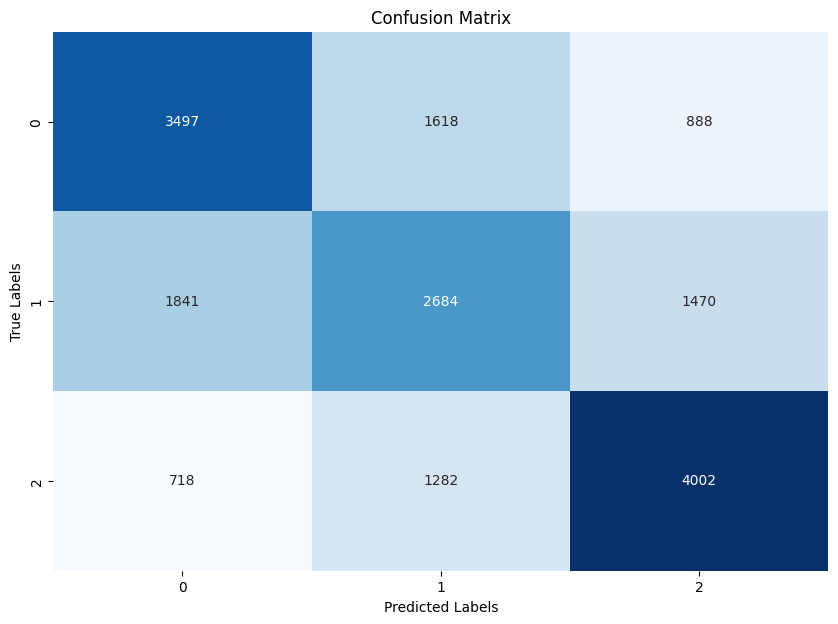

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Step 2. Feedforward Neural Network (FNN)

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

np.random.seed(34)
# first feature (matrix with missing data)
X = np.array([np.array(lst) for lst in cnct_df['Xobs']])
y = cnct_df['MDM']

# second feature (boolean matrix)
X2 = np.array([np.array(lst) for lst in cnct_df['Xmis']])

# split the data into training and testing sets
X_train, X_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, shuffle = True, random_state = 34)

# reshape the first feature
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# reshape and concatenate the second feature
X2_train_flat = X2_train.reshape(X2_train.shape[0], -1)
X2_test_flat = X2_test.reshape(X2_test.shape[0], -1)
X_train_combined = np.concatenate((X_train_flat, X2_train_flat), axis=1)
X_test_combined = np.concatenate((X_test_flat, X2_test_flat), axis=1)

# the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Masking(mask_value=np.nan, input_shape=(X_train_combined.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes (0, 1, 2)
])

new_learning_rate = 0.01  # learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=new_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_split=0.2)

# model quality
loss, accuracy = model.evaluate(X_test_combined, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# predictions
predictions = model.predict(X_test_combined)
predicted_classes = np.argmax(predictions, axis=1)

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3323
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3323
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3323
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3323
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3323
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3323
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.3335 - val_loss: nan - val_accuracy: 0.3323
Epoch 8/10
1050/1050 [============

#### To avoid loss = nan we need to get rid of gaps in the data by imputing constant values

In [ ]:
import tensorflow as tf
from sklearn.impute import SimpleImputer

np.random.seed(34)
# first feature (matrix with missing data)
X = np.array([np.array(lst) for lst in cnct_df['Xobs']])
y = cnct_df['MDM']

# second feature (boolean matrix)
X2 = np.array([np.array(lst) for lst in cnct_df['Xmis']])

# split the data into training and testing sets
X_train, X_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, shuffle = True, random_state = 34)

# reshape the first feature
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# reshape and concatenate the second feature
X2_train_flat = X2_train.reshape(X2_train.shape[0], -1)
X2_test_flat = X2_test.reshape(X2_test.shape[0], -1)

# to avoid loss = nan we need to get rid of gaps in the data
imputer = SimpleImputer(strategy='constant', fill_value=999)

X_train_flat_imputed = imputer.fit_transform(X_train_flat)
X_test_flat_imputed = imputer.transform(X_test_flat)

X_train_combined = np.concatenate((X_train_flat_imputed, X2_train_flat), axis=1)
X_test_combined = np.concatenate((X_test_flat_imputed, X2_test_flat), axis=1)

# the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Masking(mask_value=np.nan, input_shape=(X_train_combined.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes (0, 1, 2)
])

new_learning_rate = 0.001  # learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=new_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train_combined, y_train, epochs=15, batch_size=32, validation_split=0.3)

# model quality
loss, accuracy = model.evaluate(X_test_combined, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# predictions
predictions = model.predict(X_test_combined)
predicted_classes = np.argmax(predictions, axis=1)

Epoch 1/15
919/919 [==============================] - 3s 3ms/step - loss: 21.3575 - accuracy: 0.3710 - val_loss: 8.0494 - val_accuracy: 0.3830
Epoch 2/15
919/919 [==============================] - 2s 2ms/step - loss: 6.3080 - accuracy: 0.3911 - val_loss: 4.8047 - val_accuracy: 0.3976
Epoch 3/15
919/919 [==============================] - 3s 4ms/step - loss: 3.4741 - accuracy: 0.3985 - val_loss: 2.4814 - val_accuracy: 0.3985
Epoch 4/15
919/919 [==============================] - 3s 3ms/step - loss: 2.2659 - accuracy: 0.4025 - val_loss: 1.8573 - val_accuracy: 0.3864
Epoch 5/15
919/919 [==============================] - 2s 2ms/step - loss: 1.6422 - accuracy: 0.4065 - val_loss: 1.4562 - val_accuracy: 0.4035
Epoch 6/15
919/919 [==============================] - 2s 2ms/step - loss: 1.3983 - accuracy: 0.4084 - val_loss: 1.3249 - val_accuracy: 0.3943
Epoch 7/15
919/919 [==============================] - 2s 2ms/step - loss: 1.2398 - accuracy: 0.4077 - val_loss: 1.1923 - val_accuracy: 0.4107
Epoch

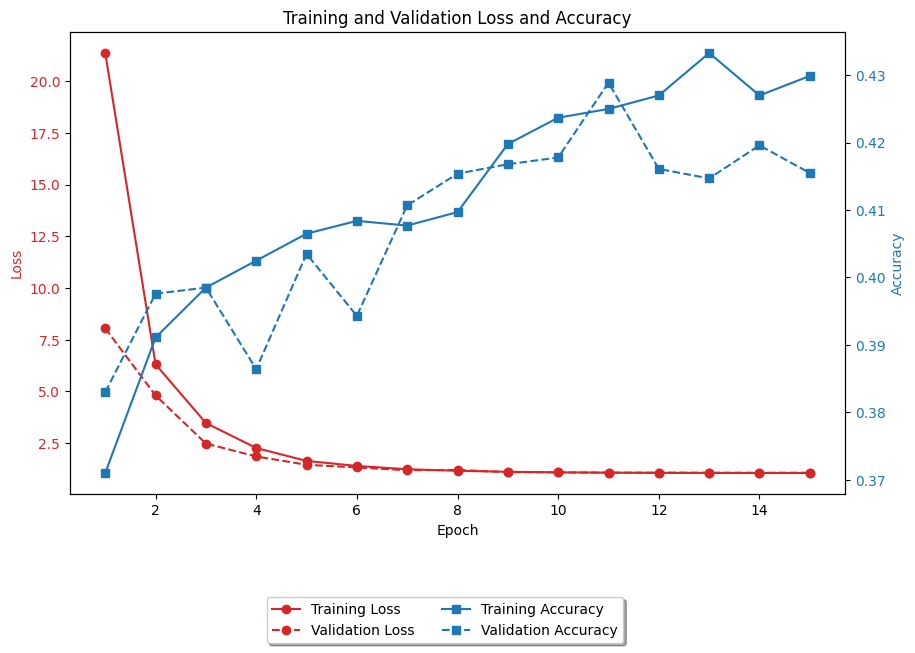

In [ ]:
# the line chart for the process of training

epochs = list(range(1, 16))
loss = [21.3575, 6.3080, 3.4741, 2.2659, 1.6422, 1.3983, 1.2398, 1.1639, 1.1171, 1.0889, 1.0740, 1.0661, 1.0604, 1.0584, 1.0579]
accuracy = [0.3710, 0.3911, 0.3985, 0.4025, 0.4065, 0.4084, 0.4077, 0.4097, 0.4198, 0.4237, 0.4250, 0.4270, 0.4333, 0.4270, 0.4299]
val_loss = [8.0494, 4.8047, 2.4814, 1.8573, 1.4562, 1.3249, 1.1923, 1.2039, 1.0994, 1.0876, 1.0741, 1.0736, 1.0723, 1.0681, 1.0696]
val_accuracy = [0.3830, 0.3976, 0.3985, 0.3864, 0.4035, 0.3943, 0.4107, 0.4154, 0.4168, 0.4178, 0.4289, 0.4161, 0.4147, 0.4196, 0.4155]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, loss, label='Training Loss', color='tab:red', marker='o')
ax1.plot(epochs, val_loss, label='Validation Loss', color='tab:red', linestyle='dashed', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, accuracy, label='Training Accuracy', color='tab:blue', marker='s')
ax2.plot(epochs, val_accuracy, label='Validation Accuracy', color='tab:blue', linestyle='dashed', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.title('Training and Validation Loss and Accuracy')

plt.show()


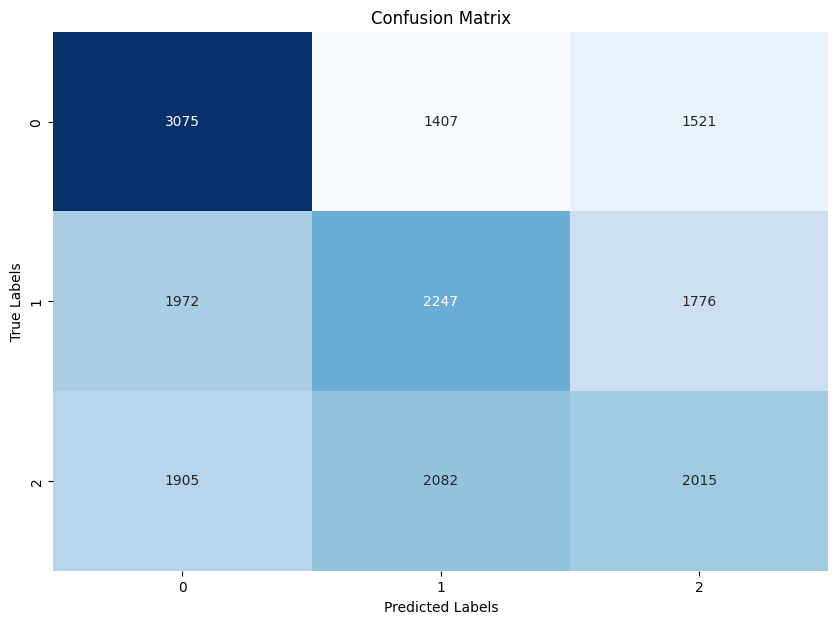

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Step 3. Convolutional Neural Network (CNN)

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

np.random.seed(34)

X = np.array([np.array(lst) for lst in cnct_df['Xobs']])
y = cnct_df['MDM']
X2 = np.array([np.array(lst) for lst in cnct_df['Xmis']])

# split the data into training and testing sets
X_train, X_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X, X2, y, test_size=0.3, shuffle=True, random_state=34)

# reshape and concatenate
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X2_train_flat = X2_train.reshape(X2_train.shape[0], -1)
X2_test_flat = X2_test.reshape(X2_test.shape[0], -1)

# imputation to handle gaps
imputer = SimpleImputer(strategy='constant', fill_value=999)
X_train_flat_imputed = imputer.fit_transform(X_train_flat)
X_test_flat_imputed = imputer.transform(X_test_flat)
X_train_combined = np.concatenate((X_train_flat_imputed, X2_train_flat), axis=1)
X_test_combined = np.concatenate((X_test_flat_imputed, X2_test_flat), axis=1)

X_train_combined = X_train_combined.reshape(X_train_combined.shape[0], X_train_combined.shape[1], 1)
X_test_combined = X_test_combined.reshape(X_test_combined.shape[0], X_test_combined.shape[1], 1)

# the CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_combined.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train_combined, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test_combined, y_test))

# evaluate the model
loss, accuracy = model.evaluate(X_test_combined, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')

Epoch 1/10
1313/1313 [==============================] - 41s 28ms/step - loss: 1.4538 - accuracy: 0.3799 - val_loss: 1.0284 - val_accuracy: 0.4345
Epoch 2/10
1313/1313 [==============================] - 33s 25ms/step - loss: 1.0427 - accuracy: 0.4212 - val_loss: 1.0268 - val_accuracy: 0.4404
Epoch 3/10
1313/1313 [==============================] - 37s 28ms/step - loss: 1.0369 - accuracy: 0.4255 - val_loss: 1.0234 - val_accuracy: 0.4382
Epoch 4/10
1313/1313 [==============================] - 40s 31ms/step - loss: 1.0339 - accuracy: 0.4298 - val_loss: 1.0259 - val_accuracy: 0.4369
Epoch 5/10
1313/1313 [==============================] - 36s 27ms/step - loss: 1.0322 - accuracy: 0.4322 - val_loss: 1.0248 - val_accuracy: 0.4417
Epoch 6/10
1313/1313 [==============================] - 40s 30ms/step - loss: 1.0296 - accuracy: 0.4337 - val_loss: 1.0225 - val_accuracy: 0.4414
Epoch 7/10
1313/1313 [==============================] - 35s 27ms/step - loss: 1.0301 - accuracy: 0.4357 - val_loss: 1.0194 -

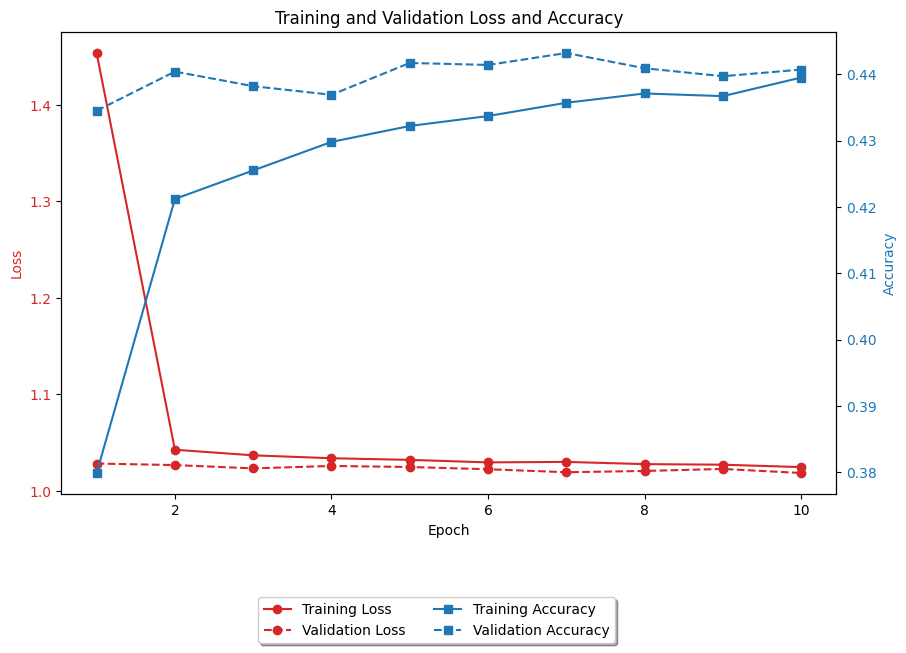

In [ ]:
# the line chart for the process of training

epochs = list(range(1, 11))
loss = [1.4538, 1.0427, 1.0369, 1.0339, 1.0322, 1.0296, 1.0301, 1.0278, 1.0272, 1.0247]
accuracy = [0.3799, 0.4212, 0.4255, 0.4298, 0.4322, 0.4337, 0.4357, 0.4371, 0.4367, 0.4395]
val_loss = [1.0284, 1.0268, 1.0234, 1.0259, 1.0248, 1.0225, 1.0194, 1.0207, 1.0228, 1.0186]
val_accuracy = [0.4345, 0.4404, 0.4382, 0.4369, 0.4417, 0.4414, 0.4432, 0.4409, 0.4397, 0.4407]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, loss, label='Training Loss', color='tab:red', marker='o')
ax1.plot(epochs, val_loss, label='Validation Loss', color='tab:red', linestyle='dashed', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, accuracy, label='Training Accuracy', color='tab:blue', marker='s')
ax2.plot(epochs, val_accuracy, label='Validation Accuracy', color='tab:blue', linestyle='dashed', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.title('Training and Validation Loss and Accuracy')
plt.show()

563/563 [==============================] - 6s 11ms/step


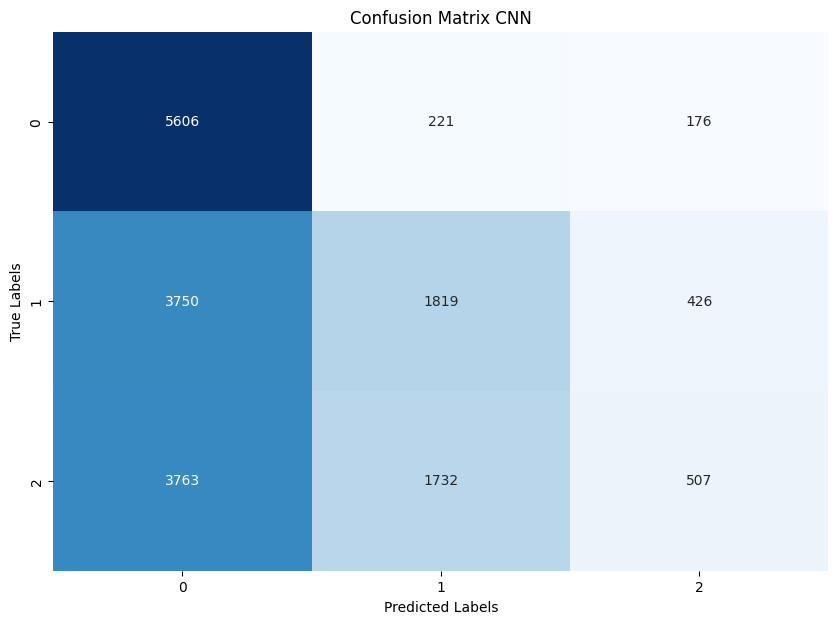

In [ ]:
# predictions
predictions = model.predict(X_test_combined)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

# plot
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Step 4. RNN (LSTM)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import tensorflow as tf

np.random.seed(34)

X = np.array([np.array(lst) for lst in cnct_df['Xobs']])
y = cnct_df['MDM']
X2 = np.array([np.array(lst) for lst in cnct_df['Xmis']])

# split the data into training and testing sets
X_train, X_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X, X2, y, test_size=0.3, shuffle=True, random_state=34)

# reshape and concatenate
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X2_train_flat = X2_train.reshape(X2_train.shape[0], -1)
X2_test_flat = X2_test.reshape(X2_test.shape[0], -1)

# imputation to handle gaps
imputer = SimpleImputer(strategy='constant', fill_value=999)
X_train_flat_imputed = imputer.fit_transform(X_train_flat)
X_test_flat_imputed = imputer.transform(X_test_flat)
X_train_combined = np.concatenate((X_train_flat_imputed, X2_train_flat), axis=1)
X_test_combined = np.concatenate((X_test_flat_imputed, X2_test_flat), axis=1)

X_train_combined = X_train_combined.reshape(X_train_combined.shape[0], X_train_combined.shape[1], 1)
X_test_combined = X_test_combined.reshape(X_test_combined.shape[0], X_test_combined.shape[1], 1)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train_combined.shape[1], X_train_combined.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes (0, 1, 2)
])

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train_combined, y_train, epochs=10, batch_size=32, validation_split=0.3)

# evaluate the model
loss, accuracy = model.evaluate(X_test_combined, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# predictions
predictions = model.predict(X_test_combined)
predicted_classes = np.argmax(predictions, axis=1)

Epoch 1/10
919/919 [==============================] - 364s 389ms/step - loss: 1.0519 - accuracy: 0.4173 - val_loss: 1.0285 - val_accuracy: 0.4377
Epoch 2/10
919/919 [==============================] - 274s 298ms/step - loss: 1.0344 - accuracy: 0.4352 - val_loss: 1.0275 - val_accuracy: 0.4386
Epoch 3/10
919/919 [==============================] - 284s 309ms/step - loss: 1.0281 - accuracy: 0.4398 - val_loss: 1.0434 - val_accuracy: 0.4392
Epoch 4/10
919/919 [==============================] - 284s 309ms/step - loss: 1.0273 - accuracy: 0.4404 - val_loss: 1.0203 - val_accuracy: 0.4463
Epoch 5/10
919/919 [==============================] - 275s 300ms/step - loss: 1.0232 - accuracy: 0.4439 - val_loss: 1.0123 - val_accuracy: 0.4452
Epoch 6/10
919/919 [==============================] - 275s 299ms/step - loss: 1.0225 - accuracy: 0.4425 - val_loss: 1.0101 - val_accuracy: 0.4571
Epoch 7/10
919/919 [==============================] - 270s 294ms/step - loss: 1.0213 - accuracy: 0.4418 - val_loss: 1.0146 -

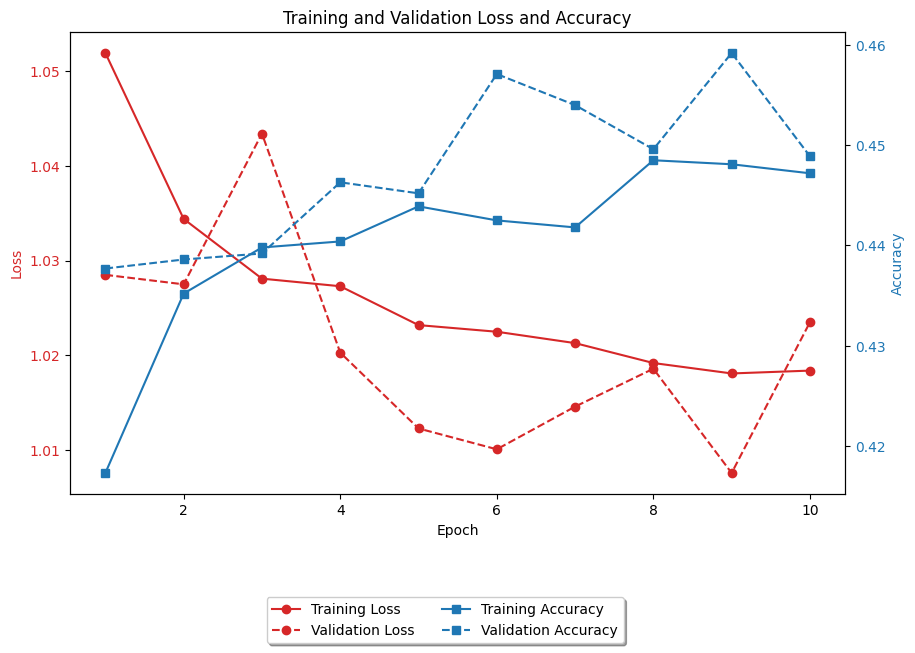

In [ ]:
# the line chart for the process of training
epochs = list(range(1, 11))
loss = [1.0519, 1.0344, 1.0281, 1.0273, 1.0232, 1.0225, 1.0213, 1.0192, 1.0181, 1.0184]
accuracy = [0.4173, 0.4352, 0.4398, 0.4404, 0.4439, 0.4425, 0.4418, 0.4485, 0.4481, 0.4472]
val_loss = [1.0285, 1.0275, 1.0434, 1.0203, 1.0123, 1.0101, 1.0146, 1.0186, 1.0076, 1.0235]
val_accuracy = [0.4377, 0.4386, 0.4392, 0.4463, 0.4452, 0.4571, 0.4540, 0.4496, 0.4592, 0.4489]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, loss, label='Training Loss', color='tab:red', marker='o')
ax1.plot(epochs, val_loss, label='Validation Loss', color='tab:red', linestyle='dashed', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, accuracy, label='Training Accuracy', color='tab:blue', marker='s')
ax2.plot(epochs, val_accuracy, label='Validation Accuracy', color='tab:blue', linestyle='dashed', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.title('Training and Validation Loss and Accuracy')
plt.show()

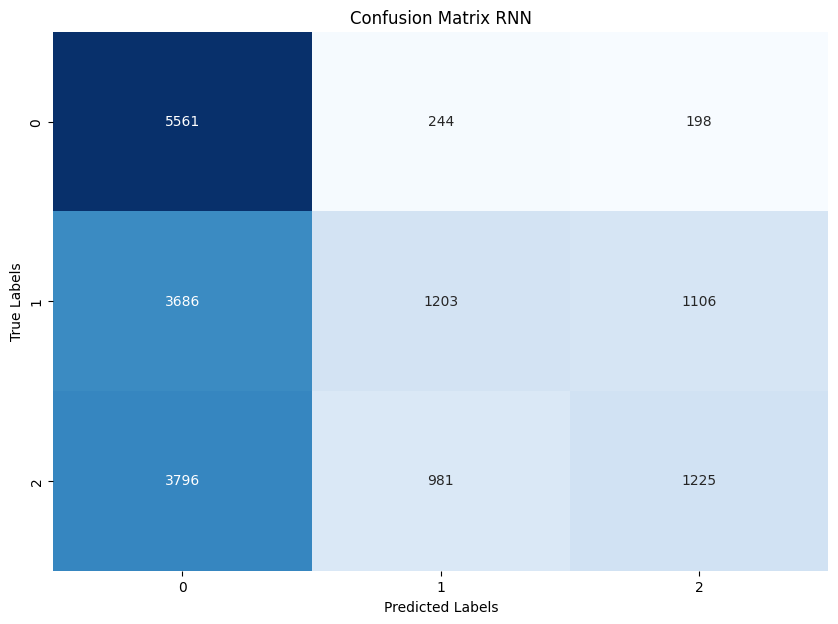

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_classes)

# plot
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix RNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()